In [2]:
from __future__ import division
from sklearn.cluster import KMeans
from numbers import Number
from pandas import DataFrame
import sys, codecs, numpy

In [3]:
#Reads file and returns the words and vectors separately
def read_file_return_clusters(vector_file, n_words):
    numpy_arrays = []
    labels_array = []
    with codecs.open(vector_file, 'r', 'utf-8') as f:
        for c, r in enumerate(f):
            sr = r.split()
            labels_array.append(sr[0])
            numpy_arrays.append( numpy.array([float(i) for i in sr[1:]]) )

            if c == n_words:
                return numpy.array( numpy_arrays ), labels_array

    return numpy.array( numpy_arrays ), labels_array

In [4]:
def find_word_clusters(labels_array, cluster_labels):
    cluster_to_words = dict()
    
    print("Right now in find_word_clusters\n")
    for clu, word in zip(cluster_labels,labels_array):
        print(clu,word)
        
        #if the key exists then append word to existing cluster
        if cluster_to_words.get(clu):
            cluster_to_words[clu].append(word)
        #else create a new list
        else:
            
            cluster_to_words[clu] = [word]
    
    print("-"*100)
    return cluster_to_words

In [5]:
#k means++
input_vector_file = 'clusterin_data.txt' # Vector file input (e.g. glove.6B.300d.txt)
n_words = 30272 # Number of words to analyze 
reduction_factor = 0.01# Amount of dimension reduction {0,1}
n_clusters = int( n_words * reduction_factor ) # Number of clusters to make

df, labels_array = read_file_return_clusters(input_vector_file, n_words)
kmeansplus_model = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10)
kmeansplus_model.fit(df)

cluster_labels  = kmeansplus_model.labels_
cluster_inertia   = kmeansplus_model.inertia_


cluster_to_words  = find_word_clusters(labels_array, cluster_labels)

print("These are the clusters : ",cluster_to_words)

Right now in find_word_clusters

179 the
179 ,
179 .
179 of
297 to
179 and
179 in
179 a
79 "
179 's
179 for
179 -
179 that
250 on
179 is
179 was
56 said
179 with
179 he
179 as
179 it
179 by
250 at
195 (
195 )
179 from
179 his
79 ''
79 ``
179 an
179 be
179 has
179 are
179 have
179 but
179 were
297 not
179 this
179 who
179 they
179 had
79 i
179 which
297 will
179 their
179 :
179 or
288 its
179 one
250 after
179 new
179 been
179 also
79 we
297 would
179 two
179 more
179 '
179 first
179 about
257 up
179 when
250 year
179 there
179 all
179 --
257 out
179 she
179 other
179 people
79 n't
179 her
115 percent
179 than
257 over
257 into
250 last
179 some
56 government
179 time
191 $
79 you
179 years
79 if
179 no
288 world
297 can
179 three
79 do
179 ;
56 president
179 only
56 state
26 million
297 could
298 us
179 most
179 _
257 against
288 u.s.
79 so
297 them
79 what
79 him
288 united
250 during
250 before
179 may
250 since
179 many
179 while
179 where
288 states
179 because
179 now
202 city
179

108 authority
8 risk
297 cannot
272 matter
192 science
108 access
67 boston
8 conditions
280 details
52 coalition
53 compared
57 lee
257 break
249 turkey
136 daughter
48 natural
202 museum
159 strike
29 style
125 paid
88 rock
213 costs
272 view
48 usually
270 spanish
195 royal
219 travel
116 takes
206 books
180 smith
67 chicago
204 systems
250 arrived
20 hundreds
79 'd
250 hour
159 response
204 developed
180 jones
297 potential
159 cause
294 value
116 idea
33 thomas
195 &
225 professional
288 domestic
267 credit
179 changed
114 gaza
136 married
89 co.
250 launched
94 web
124 p.m.
82 muslim
48 source
79 everything
250 weekend
141 camp
257 quickly
267 owned
56 finance
114 palestinians
257 eventually
203 measures
37 cities
56 afp
153 blue
33 richard
250 starting
297 ready
62 plant
297 build
204 designed
272 certain
259 voters
29 modern
227 fans
232 commercial
298 bid
195 provided
301 constitution
243 dropped
290 brother
195 canadian
257 drive
63 goals
55 negotiations
56 affairs
100 unit
2

77 lanka
250 brief
116 becomes
225 clubs
57 chen
86 sydney
78 columbia
62 export
220 surgery
55 dialogue
135 consecutive
255 madrid
79 wait
151 analysis
26 tons
160 municipality
48 referred
71 tracks
257 moves
82 muslims
213 unemployment
181 soldier
192 engineering
59 provincial
37 towns
180 taylor
221 wind
153 color
48 alternative
272 knowledge
230 pictures
1 screen
206 edition
25 toll
125 retirement
9 1985
241 theatre
267 clients
248 pilot
244 berlin
108 enforcement
298 commitment
232 purchase
195 newly
243 dow
1 electronic
180 howard
193 woods
31 suspect
63 tied
138 wales
202 avenue
288 abroad
256 teacher
294 limit
213 balance
159 seriously
155 opponents
79 feeling
181 detained
202 memorial
20 protesters
202 downtown
259 presidency
212 banned
214 revolution
67 toronto
48 distribution
128 violent
257 picked
232 brand
257 turning
116 reality
202 palace
298 supporting
234 fashion
153 suit
68 acts
176 ms.
240 roads
103 connection
272 broad
297 interested
298 considering
155 favor
288 ma

42 starring
79 definitely
149 smoke
59 delhi
13 engineer
65 seeded
74 citizen
266 foreigners
225 competed
298 homeland
224 somalia
252 anger
93 kings
159 renewed
237 shops
131 shoulder
105 toyota
280 correct
33 walter
282 fiction
73 rio
147 yugoslav
297 replacement
79 convinced
180 hamilton
79 absolutely
78 counties
204 technologies
225 swimming
267 ownership
180 bruce
147 danish
164 1950s
273 founding
100 helicopters
24 tribal
195 dates
1 installed
75 surrounded
103 investigate
250 upcoming
94 messages
116 manner
116 enjoyed
247 1963
75 settlements
297 survive
203 implementation
213 economies
170 viewers
31 hunt
181 hostage
221 temperature
37 territories
48 tend
75 compound
241 oscar
257 rush
229 jesus
24 albanian
190 notice
32 consequences
91 campaigns
116 brings
128 incidents
234 clothes
116 interesting
79 tomorrow
54 routes
169 boats
181 hostages
33 douglas
155 disputed
202 parks
147 austrian
180 dave
272 moral
47 circle
209 18th
294 zero
272 extent
247 1948
74 longtime
48 ordinary

191 pesos
53 earning
223 rallied
199 disclosed
204 integrated
181 villagers
127 multi
213 rebound
154 intel
220 therapy
48 root
267 invested
30 completion
155 intent
136 margaret
172 grants
251 cohen
195 occasions
112 persuade
180 jon
207 cat
116 odds
107 lap
126 rumsfeld
155 favored
178 cocaine
167 satisfied
8 burden
198 connections
48 comparison
284 manuel
127 emphasis
190 filing
194 stanford
259 governors
280 timing
101 funny
272 reflects
229 chapel
114 palestine
195 distinguished
16 professionals
30 improvements
161 homeless
150 arabic
259 constituency
31 revenge
114 islamabad
21 announcing
28 hah
21 partial
214 rebellion
288 internationally
244 petersburg
290 reign
226 lakes
106 76
272 exists
90 airbus
152 bible
286 hassan
153 pink
209 5th
210 indictment
280 errors
106 74
275 integrity
116 choices
259 deputies
169 expedition
112 reluctant
37 zones
65 7-5
159 aftermath
93 cardinals
219 destination
183 displayed
112 assume
142 pregnant
256 lessons
32 terrible
47 boards
143 opener
18

138 bristol
95 accommodate
232 packages
181 policeman
161 jobless
292 meal
175 heaven
279 continuous
184 jumping
217 destroying
241 nominations
198 subscribers
133 approaching
247 1915
185 nyt
34 maps
138 edinburgh
217 blown
35 trader
206 historians
223 beats
185 ni
283 koizumi
218 surveys
204 dynamic
192 psychology
33 gregory
201 notorious
180 rod
21 lengthy
106 92
127 concentrate
263 centered
184 diving
213 lowered
244 hamburg
115 0.1
55 informal
111 j
123 sauce
219 accessible
77 burma
255 valencia
67 l.a.
249 luxembourg
48 concentrated
219 venues
93 bruins
195 thereafter
205 proliferation
173 mercury
100 evacuation
40 ceremonies
247 1916
58 bolton
92 sen
173 toxic
235 button
106 89
16 recruited
284 perez
213 slower
79 ought
88 instrumental
170 mtv
70 talented
191 gallon
248 collision
63 trick
284 alberto
95 mansion
273 advocacy
25 devastated
276 vegetables
5 congressman
58 premiership
94 instant
93 nets
272 define
185 __
33 i.
65 qualifier
49 holland
114 ankara
206 illustrated
122 .

127 restoring
130 shootout
228 beckham
8 affects
86 harbour
5 palin
260 tin
230 depicted
65 4-6
268 archaeological
140 amp
292 dishes
168 stiff
16 recruit
55 unilateral
238 finale
35 citigroup
195 comprising
195 thirteen
15 dried
215 midst
290 honours
53 smallest
241 grammy
125 dividend
207 breed
92 hun
125 payroll
264 conductor
176 lynn
248 crashes
155 excluded
94 libraries
110 ss
75 shelters
248 flies
60 bee
276 calories
75 confined
68 racist
24 farc
263 segments
70 favourite
10 elvis
180 brett
252 emotion
244 kiev
129 hilton
269 lima
293 dismissal
75 barracks
193 ryder
80 exceptional
45 allan
172 recipients
264 wagner
125 incentive
99 firearms
263 trans
259 runoff
293 plaintiffs
177 liver
167 confronted
240 corridor
165 davenport
48 cluster
30 layoffs
127 sustain
180 o'connor
244 zagreb
180 tracy
219 boarding
251 meyer
103 fixing
18 carved
51 podium
166 battled
63 chasing
66 cliff
237 supermarket
210 juvenile
155 overwhelmingly
294 intermediate
167 delighted
204 navigation
45 malcol

103 irregularities
257 proceeded
35 hsbc
70 formidable
176 jo
57 mae
13 entrepreneur
157 npc
57 jung
118 so-called
21 moratorium
235 handles
181 stabbed
30 gradual
77 mali
14 24-year
17 1860
125 lend
191 totaling
36 logical
190 signatures
166 marred
168 mixing
91 embarked
48 readily
243 bourse
94 websites
7 rao
61 tackles
76 encounters
132 slashed
14 23-year
55 communique
174 hawk
275 necessity
201 petty
263 stretching
125 taxpayer
139 resistant
180 quinn
128 persecution
213 owing
235 boot
105 chevrolet
231 mao
275 stressing
29 gothic
49 milton
181 drowned
272 complexity
161 disability
206 autobiography
46 zemin
286 hasan
101 entertaining
30 adjustment
31 slaying
14 21-year
40 pilgrimage
294 quantity
172 quota
144 stan
274 bulletin
93 clippers
16 consultants
76 conflicting
75 premises
167 disagree
153 masks
55 restart
270 rican
169 wreck
240 trunk
135 knockout
192 cornell
189 enforced
132 surging
231 dong
39 moses
85 rochester
16 trusted
87 collectors
48 distinguish
61 mvp
193 lpga
24 

46 welcoming
146 xvi
57 lim
8 catastrophic
138 lancashire
193 anita
204 configuration
293 contempt
238 schedules
203 austerity
31 spies
52 liners
151 ecology
19 importantly
3 residency
126 paulson
127 alliances
211 moist
113 disagreements
59 kerala
104 steer
169 liner
152 judaism
180 matthews
11 expressions
212 prohibit
256 admissions
31 thieves
256 diploma
126 truman
192 thesis
17 1877
130 mock
95 auditorium
115 5.7
191 franc
36 vector
282 blockbuster
113 blames
196 snail
216 awkward
27 domination
131 hamstring
204 incorporate
16 staffers
139 mammals
4 145
8 dependence
98 ernst
49 sutton
129 mesa
139 larvae
15 curry
58 wigan
45 dawson
93 brewers
73 bogota
204 devised
272 considerations
130 barrage
279 readings
98 wolfgang
231 yan
176 wendy
130 spree
273 endowment
51 golds
87 smuggled
32 troubling
74 builder
161 tenants
34 timeline
275 recognise
269 são
66 fork
72 alzheimer
188 haas
19 wonders
248 airliner
208 mecca
160 present-day
207 spider
19 imagined
1 embedded
139 viruses
49 payne

170 affiliates
32 weaknesses
103 proxy
169 ashore
64 kidd
138 berkshire
242 incursion
293 recounts
183 stained
225 rowing
101 laughs
189 stringent
4 146
50 aden
280 satisfactory
275 norms
21 stall
80 devotion
238 lasts
94 subscription
254 indoors
40 coincide
271 irregular
177 colon
244 basel
16 replacements
25 devastation
222 referees
130 daring
57 yong
93 seahawks
164 prevalent
282 monsters
279 acceleration
139 feeds
77 burkina
134 cleaned
282 oz
113 discontent
249 czechoslovakia
127 concentrating
68 insult
143 ponting
265 scots
228 eriksson
133 ladder
88 disco
228 keane
252 stirred
201 cyber
32 confronting
136 thatcher
206 passages
238 scheduling
251 kaiser
148 moderately
57 pak
226 watershed
212 violates
274 yonhap
74 butcher
276 dough
295 pepsi
280 explanations
165 goran
214 regimes
117 1600
173 saturated
116 satisfying
104 defuse
49 stevenson
40 festivities
174 phantom
194 baylor
16 advising
245 pna
214 baath
174 shining
16 educators
232 owning
284 guerrero
234 miniature
115 6.8
2

45 gallagher
184 cyclist
277 benin
10 bono
263 expands
41 7.4
228 mourinho
204 incorporating
201 bandits
293 motions
53 yielding
269 paz
32 overcoming
93 sonics
104 capitalize
30 upgrades
7 patel
30 phased
92 benazir
144 boone
243 capitalization
151 analyzing
58 albion
95 motel
68 insulting
13 educator
31 freeing
279 seismic
184 enthusiasts
4 144
36 finite
280 clearer
54 parcel
3 preferential
174 sonic
189 defying
214 u.s.-backed
41 7.7
290 descendant
285 magnet
99 shotgun
75 densely
111 th
76 discusses
36 proportional
231 jia
69 prayed
281 astronomical
118 derivative
281 odyssey
17 1837
156 atom
27 zionist
174 falcon
251 larsen
110 squadrons
85 fairfax
263 merging
183 replica
37 lawless
221 icy
216 fond
45 percy
176 carolyn
174 sage
158 putts
279 decay
285 bidders
259 vacated
89 u.s.-based
15 soy
292 barbecue
165 henman
80 admiration
219 amenities
125 foreclosure
59 chennai
32 severity
186 subspecies
161 hourly
248 tankers
291 wow
211 oceans
252 sorrow
193 westwood
120 blatter
74 thie

87 trophies
28 kahr
174 ark
122 ledger
151 feasibility
86 isles
244 antwerp
44 tackled
176 tiffany
95 booths
170 seinfeld
208 baku
216 ambiguous
229 monasteries
127 flourish
252 grievances
273 cio
227 roar
25 landfall
142 newborn
237 chic
29 scenery
55 disarming
119 meaningless
75 detached
239 lamps
0 willy
279 progression
111 sp
235 pads
22 amos
99 armour
30 closures
95 stalls
91 ngo
68 disregard
77 equatorial
5 sens.
176 sonia
166 escalate
146 fr
12 fao
49 frazier
76 contradictory
150 fluent
285 bidder
57 dae
89 bhd
57 ta
136 irene
227 screamed
104 soften
158 fairway
290 posthumously
145 polluted
176 carrie
127 stabilizing
268 excavations
66 homestead
35 amro
85 ala.
279 resonance
153 blonde
218 gallup
66 evergreen
139 weed
103 libel
16 interviewing
240 exits
145 canals
199 informant
122 vanity
41 8.6
63 conversions
53 surpassing
53 cumulative
301 proclamation
157 cppcc
229 interred
11 exchanging
215 frantic
89 petrochemical
235 cutter
46 praises
281 iss
46 attends
172 vouchers
134 c

229 47-42-18-81
61 longhorns
117 1300
90 klm
210 adultery
174 terra
279 induce
53 expectancy
44 dived
285 heavyweights
97 kilometre
21 embark
244 bern
156 receptors
122 harpercollins
45 leroy
119 inactive
96 375
175 psychic
129 fiesta
299 lockout
134 stocked
2 cardoso
137 anhui
2 susilo
11 contrasts
251 hanna
30 resettlement
24 gam
289 rammed
221 haze
49 patton
51 breaststroke
204 coherent
113 gloom
248 a380
199 disclosures
73 nicosia
119 enormously
251 epstein
7 chandra
49 nathaniel
155 hotly
4 158
45 sampson
31 murderers
49 clifton
177 inflammation
46 warmly
95 crammed
43 0.05
289 marshals
178 nicotine
291 clown
104 erode
3 confidentiality
235 gears
94 hackers
243 nymex
31 evade
64 garnett
2 jeou
269 ponte
119 inefficient
291 merry
89 hydro
133 northward
254 flung
248 747
27 notions
4 advancers
205 npt
118 terminology
284 suarez
145 tributaries
287 downplayed
157 parliaments
254 panicked
36 corresponds
126 rangel
93 grizzlies
132 stagnant
216 oddly
183 brightly
239 pedal
167 favorabl

149 swirling
231 tao
256 postgraduate
96 kilos
17 1819
69 grieving
258 edible
265 monarchs
262 manipulating
165 kuerten
287 signalled
145 draining
188 gaston
21 defection
284 herrera
118 slang
36 symmetry
74 pleads
201 murderous
129 sonoma
197 fayed
266 starving
290 paternal
204 functionality
6 shakes
156 enzymes
93 dodger
45 baird
286 salah
263 geographically
239 rotary
60 ak
153 sleeves
211 temperate
248 737
130 outburst
176 dolly
189 curbs
43 225-issue
161 hmos
111 lt
85 trenton
49 peck
294 conversely
111 af
239 defective
4 176
169 capsized
38 fernandes
121 az
251 saul
57 peg
1 activate
20 cordoned
197 pardoned
25 inundated
112 intending
98 larsson
111 hr
273 scientology
164 mainstay
235 twisting
144 michaels
141 disarmed
187 bogged
18 ornate
283 murayama
129 burbank
228 shearer
217 driveway
64 shanahan
13 sociologist
70 buddies
17 1809
44 leaned
176 maureen
85 christi
85 knoxville
261 24,000
13 illustrator
169 diver
42 sylvester
45 talbot
239 furnace
236 bakiyev
118 masculine
10 sp

101 imitation
125 taxed
172 vat
133 trajectory
281 martian
171 miramax
222 concacaf
75 enclosure
41 11.2
6 jaws
18 nave
283 bharatiya
166 insurrection
133 skid
222 berths
222 midweek
148 softening
157 politburo
81 1.15
218 pollsters
209 penultimate
251 wolff
21 eviction
256 academies
205 restarted
175 rebirth
50 musab
173 residue
276 stuffing
207 donkey
75 demilitarized
265 pomerania
31 masterminding
279 scattering
201 greedy
124 3:30
199 memos
165 rusedski
234 accessory
142 underage
8 deforestation
251 egan
284 garcía
98 rolf
254 wander
167 puzzled
92 tutu
164 1800s
57 sef
244 haute
2 cardenas
22 mehmet
3 30-day
70 magician
126 miers
25 gusts
215 gripping
28 ehl
143 jayasuriya
30 alterations
216 vaguely
35 rothschild
262 demoted
173 smog
6 rocking
20 retaliated
76 abound
125 levied
255 corinthians
101 marvelous
185 fla
36 diagram
44 brilliantly
230 murals
142 heterosexual
282 zombie
287 categorically
238 30-minute
85 pensacola
53 tallied
38 mauro
49 ballard
251 billings
6 chewing
190 

82 pastors
149 smells
45 archibald
254 masse
69 politely
46 stopover
172 excise
226 tigris
148 bearish
261 2,800
276 biscuits
244 thessaloniki
238 interrupt
80 vigor
234 ornaments
294 iq
45 x.
266 colombians
61 sooners
193 borg
83 »
240 north-south
144 scully
12 oxfam
205 reprocessing
143 harbhajan
245 yossi
72 hypertension
185 p.o.
235 irons
281 neptune
292 sushi
2 camara
45 barlow
105 lola
289 booby
161 hmo
236 tupac
85 allegheny
216 downright
83 latina
253 piniella
38 conde
72 heartbeat
234 jewellery
144 davey
98 erich
254 barefoot
254 nightfall
239 adjustable
144 keenan
19 underestimate
279 gravitational
31 hijacker
265 nominally
174 moniker
60 nas
269 dominguez
275 broadened
200 kivu
153 tattoos
269 guevara
136 fiancee
225 greats
200 basilan
215 hitch
282 spin-off
141 paratroopers
103 soliciting
259 elects
215 hectic
24 republika
95 dilapidated
44 clipped
80 compliment
245 gilad
178 placebo
211 wetland
208 har
140 penney
301 governs
38 filippo
235 forks
123 cloves
61 seminoles
137

80 intellect
129 vail
85 okla.
143 openers
96 435
128 expulsions
107 mcrae
139 spawn
2 akayev
39 lombard
45 hedges
236 sese
99 torpedoes
282 tolkien
72 childbirth
210 arraigned
277 sardinia
266 vacationing
92 cpp
279 anomaly
163 zhirinovsky
39 gideon
22 takahashi
220 pediatrics
165 soderling
262 verbally
266 venezuelans
221 searing
124 tuesdays
215 fruitless
158 jumpers
42 hawke
178 purification
287 retracted
277 phuket
1 microphones
258 lavender
167 amused
80 stamina
29 aesthetics
152 liturgical
172 deductible
22 milo
94 catalogs
252 indignation
22 marko
229 apostle
126 wagoner
266 cambodians
167 keenly
35 carlyle
280 discrepancy
104 publicize
207 mule
43 0.07
187 disintegration
54 greyhound
57 ong
252 irritation
117 2:00
24 spla
254 circling
165 kournikova
169 trawler
85 huntsville
241 presenters
68 undesirable
98 matthias
167 understandably
28 uhs
91 engages
81 1.00
184 jockeys
112 willingly
174 juno
139 rodents
193 henley
136 eliza
266 bulgarians
125 bailouts
43 0.09
265 habsburg
0

152 doctrines
26 85,000
153 curly
282 sherlock
74 rancher
258 jasmine
95 confines
70 enigmatic
125 reimburse
123 diced
41 12.1
187 reshape
45 o'neil
19 realistically
87 negatives
167 mourned
6 busting
169 kursk
50 moammar
52 firebrand
207 antelope
281 liftoff
85 ymca
60 gur
253 mussina
174 serpent
6 tongues
163 yulia
127 enhances
191 4.75
188 karin
89 hynix
154 apps
216 serene
236 amal
166 agitation
262 censors
194 grad
74 barrister
64 bibby
32 failings
6 rubbing
59 orissa
88 catchy
54 shipyards
217 gaping
167 traumatized
175 thy
207 barking
176 tanya
49 wentworth
68 unwarranted
49 greenfield
31 plotters
118 nouns
148 overstated
269 vila
19 endlessly
75 encircled
265 sultanate
120 wim
244 karlsruhe
171 hasbro
145 outflow
276 pies
45 kruger
161 maids
253 maris
113 resurfaced
219 caters
200 tora
201 kingpin
134 refrigerated
269 cordoba
23 jpn
184 jogging
183 etched
102 motorbike
28 reh
94 accessing
223 8-0
206 periodical
3 retroactive
234 yarn
241 directorial
172 a-year
256 undergraduate

175 enchanted
6 comb
260 latex
72 epilepsy
5 domenici
226 euphrates
69 awoke
7 hari
274 presse
228 robinho
258 blossoms
49 wainwright
49 revere
94 brochures
176 patsy
2 nagin
140 ralston
45 blanchard
29 exemplified
258 stalks
144 orton
251 falk
154 blu
98 schmitt
58 millwall
5 carnahan
120 juncker
186 iucn
226 tundra
231 shang
134 conditioners
85 eureka
253 francona
245 erakat
45 thurston
29 modernism
128 stoning
184 golfing
259 abstentions
278 saber
32 missteps
38 matteo
143 wasim
28 keer
215 labored
98 theodor
19 symbolically
45 sanderson
8 hindering
256 mentoring
45 mcnulty
137 changchun
119 hopelessly
120 charette
178 stimulant
136 louisa
279 reflex
72 allergies
145 catchment
225 gymnasts
277 polynesia
45 drury
255 atlético
27 ethos
154 microprocessor
172 reaped
284 frei
35 llp
69 bedside
194 unc
216 hyper
24 pflp
251 devlin
5 hoyer
36 deviation
233 caen
13 thinker
262 corrupted
148 factored
57 coa
27 repressed
144 raines
70 cheerleader
268 carvings
101 glimpses
236 buyoya
171 3com

122 elle
34 diagrams
258 pods
105 puma
150 cajun
185 enditalic
19 fruition
181 abductors
157 fomc
185 beginitalic
22 ilya
80 agility
290 baronetcy
12 apa
187 resurrect
143 muttiah
6 elbows
42 cleopatra
41 17.8
285 memberships
268 exhumed
80 modesty
229 crucifixion
36 variance
45 mathew
233 vicenza
101 believable
111 fg
284 sánchez
129 coney
265 mongols
194 saban
49 claiborne
72 coughing
10 dogg
229 friars
11 allusion
275 detriment
31 smuggler
6 egos
176 mimi
252 annoyance
38 domenico
144 bettman
76 manifestations
27 overtly
136 marguerite
174 ua
58 hibernian
210 trespassing
90 kirch
123 seasoning
269 prado
60 lahm
189 blockades
177 clot
150 nomads
40 commemorations
41 25.5
138 waikato
291 whiz
100 navies
220 anesthesia
49 kearney
207 grizzly
94 metacritic
184 sprints
158 slider
27 overtones
31 plunder
66 gully
38 martino
187 spoils
27 manifested
173 biomass
286 chowdhury
170 couric
290 caliph
1 clicked
74 weyded
174 scorpion
59 jalan
194 csun
260 molten
291 bum
262 bullied
55 u.s.-chin

68 incomprehensible
217 shacks
145 rainwater
10 gaga
166 rages
176 merle
66 kettle
191 koruna
12 nhtsa
119 unduly
233 biarritz
42 sondheim
277 transvaal
268 zoological
35 waterhouse
269 cordova
277 gerais
5 kyl
60 ros
230 matisse
287 singling
251 wiener
58 roosters
64 guerin
199 wiretaps
193 stricker
2 nicolae
198 skype
217 wrecks
283 karamanlis
59 perak
8 exposures
43 0.52
144 mcdaniel
126 barshefsky
87 bequeathed
262 cronies
228 cisse
19 lastly
149 igniting
187 shatter
243 3/16
212 infringed
266 macedonians
148 fretted
262 obstructed
199 unabomber
51 bronzes
196 hermit
41 18.7
85 susquehanna
20 erecting
42 lindbergh
58 parramatta
286 nasir
170 nightline
174 cms
244 potsdam
2 eyadema
131 crutches
216 nimble
122 unrated
129 dorado
5 harkin
136 antoinette
46 akihito
253 irabu
142 caregivers
119 spiritually
36 formula_9
127 furthering
201 mobster
144 westbrook
11 conveying
165 stich
148 overvalued
75 derelict
188 arg
255 salamanca
245 khatib
64 billups
6 boils
57 tsu
18 stucco
125 payabl

In [6]:
#writing the clutered elements into a text document
i=0
with open(input_vector_file.replace('.txt','')+'Kmeans++_clusters.txt','w',encoding="UTF-8") as f:
    for cluster_number, words in cluster_to_words.items():
        f.write("cluster"+str(i)+"|" + "|".join(words)+'\n')
        i=i+1
        

In [7]:
#k means clustering
input_vector_file = 'clusterin_data.txt' # Vector file input (e.g. glove.6B.300d.txt)
n_words = 30272 # Number of words to analyze 
reduction_factor = 0.01# Amount of dimension reduction {0,1}
n_clusters = int( n_words * reduction_factor ) # Number of clusters to make

df, labels_array = read_file_return_clusters(input_vector_file, n_words)
kmeans_model = KMeans(init='random', n_clusters=n_clusters, n_init=10)
kmeans_model.fit(df)

cluster_labels  = kmeans_model.labels_
cluster_inertia   = kmeans_model.inertia_


cluster_to_words  = find_word_clusters(labels_array, cluster_labels)

print("These are the clusters : ",cluster_to_words)

Right now in find_word_clusters

217 the
217 ,
217 .
266 of
78 to
217 and
217 in
217 a
264 "
217 's
217 for
217 -
192 that
217 on
266 is
217 was
15 said
217 with
217 he
217 as
264 it
217 by
217 at
148 (
148 )
217 from
217 his
264 ''
264 ``
217 an
192 be
217 has
266 are
192 have
217 but
217 were
264 not
192 this
217 who
264 they
217 had
264 i
266 which
78 will
78 their
264 :
266 or
266 its
217 one
217 after
217 new
217 been
217 also
264 we
78 would
217 two
192 more
264 '
217 first
217 about
217 up
217 when
148 year
192 there
217 all
217 --
217 out
264 she
266 other
192 people
264 n't
240 her
232 percent
232 than
217 over
217 into
217 last
192 some
212 government
217 time
232 $
264 you
217 years
264 if
264 no
7 world
264 can
217 three
264 do
266 ;
25 president
217 only
212 state
232 million
78 could
78 us
192 most
264 _
217 against
25 u.s.
264 so
78 them
264 what
264 him
212 united
217 during
217 before
192 may
217 since
192 many
217 while
217 where
212 states
192 because
217 now
188 cit

192 certain
138 voters
267 modern
2 fans
162 commercial
78 bid
266 provided
51 constitution
281 dropped
240 brother
7 canadian
217 drive
176 goals
247 negotiations
15 affairs
49 unit
258 questions
192 significant
266 create
37 bomb
25 warned
238 religious
226 minute
192 figures
202 victims
192 condition
212 activities
229 upon
217 leaving
192 experience
168 =
9 attorney
266 standard
6 proposed
210 intelligence
78 giving
227 hotel
217 finally
139 magazine
240 whom
210 experts
217 moving
152 quoted
261 baghdad
210 carried
61 feet
138 candidate
19 fifth
191 highest
126 lake
154 employees
203 sell
190 pacific
148 31
266 mostly
264 reason
58 flight
228 square
191 overall
148 1993
187 design
217 passed
158 focus
199 bay
16 dlrs
217 date
258 letter
148 1992
61 wide
192 effect
40 charged
148 29
280 phone
192 figure
78 attempt
210 claims
191 below
191 profit
232 200
162 industrial
7 zealand
232 estimated
266 traditional
94 size
217 practice
269 cars
217 double
148 2013
226 pass
217 hands
22 pro

277 activists
51 constitutional
265 andrew
287 bird
266 unlike
282 researchers
191 forecast
76 electricity
82 garden
258 indicated
218 1/2
7 austria
264 watching
31 snow
217 pushed
192 elsewhere
203 retail
181 1983
156 arm
258 repeatedly
44 suffering
290 invasion
250 struggle
289 nfl
61 length
82 tree
52 flu
207 indonesian
218 75
175 schedule
252 wilson
264 seeing
275 surprise
265 stephen
252 ben
53 sharp
192 resistance
141 targets
78 secure
275 tie
283 santa
280 photos
43 kenya
258 discussed
87 letters
40 scandal
212 creation
258 delay
238 holy
142 operated
78 sending
112 corporation
266 typically
128 founder
263 recording
264 whatever
181 1982
147 wave
232 households
115 brazilian
178 dominated
53 weak
199 dallas
29 drama
19 1st
287 animal
210 destruction
146 st
244 tourists
148 aug.
265 sir
83 models
265 edward
203 contracts
57 filled
273 li
238 jews
178 favorite
236 rugby
192 extremely
154 paying
78 hoping
266 memory
210 terrorists
44 treated
144 faith
264 remember
217 shut
261 hum

277 crackdown
68 birthday
252 dick
240 affair
281 climbed
255 wealth
129 50,000
56 jacques
34 cairo
156 mouth
182 nasa
112 holdings
247 negotiating
289 chiefs
4 spoken
192 viewed
280 ads
291 ontario
210 feared
154 salary
116 milk
116 beer
291 melbourne
150 dvd
235 prix
61 passage
76 petroleum
201 soul
158 expanding
234 laboratory
95 jan
203 customer
5 conservatives
98 constant
45 attitude
252 phil
65 assessment
181 1947
175 sessions
70 defended
231 runner
264 thinks
261 peacekeeping
141 missions
252 barry
228 situated
218 56
68 eve
273 ma
72 n.y.
153 metres
13 geneva
181 renamed
78 manage
76 mines
252 chase
278 geography
159 clothing
264 keeps
218 85
161 lane
218 53
238 orthodox
78 seeks
281 nasdaq
285 residential
264 realize
140 wage
279 wto
285 blocks
179 assassination
158 contribute
63 doubles
289 rookie
33 lots
228 entrance
120 kilometres
209 luis
158 contribution
217 barely
273 hu
61 height
252 morris
290 lands
181 1961
240 princess
221 files
50 studios
243 conservation
229 tradit

78 intent
64 margaret
154 grants
143 cohen
229 occasions
294 persuade
252 jon
299 cat
178 odds
96 lap
54 rumsfeld
178 favored
135 cocaine
294 satisfied
98 burden
266 connections
94 comparison
209 manuel
208 emphasis
9 filing
268 stanford
107 governors
230 timing
124 funny
208 reflects
146 chapel
41 palestine
22 distinguished
186 professionals
158 improvements
202 homeless
4 arabic
88 constituency
179 revenge
114 islamabad
258 announcing
215 hah
204 partial
183 rebellion
229 internationally
293 petersburg
296 reign
126 lakes
218 76
208 exists
222 airbus
87 bible
109 hassan
185 pink
19 5th
9 indictment
230 errors
218 74
69 integrity
208 choices
107 deputies
35 expedition
294 reluctant
188 zones
63 7-5
250 aftermath
24 cardinals
33 destination
102 displayed
294 assume
240 pregnant
186 lessons
257 terrible
213 boards
39 opener
252 sean
231 sprint
295 1.6
266 component
65 examination
131 embargo
29 novels
80 sub
23 divorce
79 bryant
262 generations
214 holocaust
15 col.
96 teammate
262 peop

197 leather
24 reds
83 hybrid
267 1920s
61 shorter
298 intensity
283 sao
252 randy
45 perfectly
191 drops
11 cigarette
252 mason
269 taxi
170 warn
117 greens
139 editions
260 admits
229 whilst
58 safely
72 va.
26 performers
273 chi
130 casting
253 halftime
22 berkeley
92 easing
77 0.3
257 cry
226 throws
19 9th
262 whites
78 convert
94 vary
115 salvador
1 atop
235 slalom
275 matched
204 valid
161 connecting
176 touchdowns
117 ingredients
267 architectural
102 displays
186 grades
115 guatemala
271 associations
84 burundi
90 tap
252 pierce
162 shipments
146 abbey
144 glory
87 poems
162 commodity
163 macao
185 colored
208 perception
257 forgotten
198 enthusiasm
61 span
216 delaware
51 accordance
245 aristide
159 designers
151 marcus
238 worship
237 juventus
25 sidelines
254 propaganda
250 inevitable
73 prisons
226 grabbed
187 printing
89 militias
221 tips
281 eased
60 averaged
108 lehman
136 michelle
81 benedict
16 baht
78 stepping
90 suitable
45 surprisingly
158 achieving
237 vs
57 bedroo

228 guarded
40 acquitted
90 marketplace
244 turks
250 prolonged
240 fathers
146 seminary
98 unnecessary
85 smashed
294 opted
156 bare
175 shifts
56 philippe
282 clinics
98 consequence
169 ana
63 serena
50 flagship
65 undertaken
133 croats
13 renew
111 portsmouth
179 plotting
31 hemisphere
163 mongolia
234 laboratories
135 piracy
107 chaired
246 est
294 understands
121 balkan
59 reply
219 medicines
183 exiled
58 embassies
244 iranians
136 rachel
178 betting
26 guild
91 exploring
250 disastrous
85 dumped
123 bias
31 rainfall
183 overthrow
158 accelerate
183 dictatorship
55 revealing
100 equation
276 gandhi
61 speeds
160 wilderness
252 greene
65 disposal
269 trailer
193 bonuses
252 newman
181 1896
231 swim
25 incoming
242 15-year
233 biden
174 arlington
207 yemeni
271 charitable
209 ramirez
213 subcommittee
280 chat
33 shoppers
5 socialists
109 ismail
124 jokes
252 floyd
6 propose
257 yeah
247 constructive
227 circus
223 con
247 doha
281 weighted
72 n.c.
106 arbitration
235 speedway
26 da

182 polar
35 hijacked
206 uribe
245 obasanjo
255 enduring
273 woo
292 1886
44 mortality
175 24-hour
271 unicef
64 teresa
214 monuments
202 locate
63 finalist
300 rooted
129 35,000
59 reaffirmed
70 sided
61 stretches
107 convened
2 cheered
85 ruined
175 handover
6 approves
133 tutsi
294 consult
71 bust
193 unlimited
51 explicitly
154 premiums
111 aston
58 escorted
271 organizer
33 leisure
18 tornado
239 consolidate
120 175
138 constituencies
9 mcveigh
156 knees
151 rhodes
204 undisclosed
10 crater
24 marlins
21 108
273 shui
87 essays
240 bride
54 madeleine
247 tentative
76 pumping
131 tariff
274 hussain
278 dynamics
257 scary
287 wolves
135 plots
147 sparking
299 crane
116 champagne
299 rainbow
2 chanted
69 conscience
178 billed
161 lanes
24 suns
52 strains
17 30th
24 mavericks
100 probability
208 sensitivity
273 chin
257 horrible
207 arabian
130 adapt
200 millionaire
10 antarctic
178 boasts
246 1500
40 espionage
117 lamb
204 concession
194 fielder
189 giovanni
16 us$
149 suzuki
195 swi

163 kaohsiung
83 automobiles
247 pave
159 upscale
278 calculations
163 tianjin
91 similarities
113 wah
109 amin
52 tuberculosis
136 stephanie
292 1869
108 ing
202 commandos
260 fortunately
48 yuri
206 saakashvili
181 inception
28 caliber
48 tomas
92 deepening
195 individually
169 xavier
256 sting
132 rudd
36 socially
153 ½
118 peters
36 neglected
92 deteriorated
103 north-west
287 pets
140 shortfall
123 tackling
59 lent
129 13,000
161 sr
291 manitoba
287 seals
257 unbelievable
36 disturbed
90 refined
11 beverage
94 heavier
193 dividends
51 prohibition
114 pristina
158 modernization
79 parcells
176 interception
44 infants
147 unleashed
184 mccartney
65 sanitation
278 interactions
75 paralyzed
167 vegetation
154 discounts
298 filter
239 doomed
157 compatible
184 bassist
3 badminton
45 handsome
29 anime
132 geoff
145 sphere
279 enlargement
23 disabilities
43 botswana
100 theorem
117 cookies
118 perkins
160 coastline
104 cylinder
165 grapes
206 lukashenko
94 sampling
72 lancaster
64 eva
20

255 devotion
175 lasts
280 subscription
235 indoors
68 coincide
145 irregular
44 colon
293 basel
132 replacements
18 devastation
236 referees
284 daring
273 yong
24 seahawks
123 prevalent
67 monsters
94 acceleration
287 feeds
43 burkina
85 cleaned
67 oz
198 discontent
121 czechoslovakia
130 concentrating
254 insult
39 ponting
290 scots
119 eriksson
14 ladder
201 disco
119 keane
198 stirred
179 cyber
123 confronting
200 thatcher
87 passages
175 scheduling
143 kaiser
53 moderately
46 pak
126 watershed
106 violates
152 yonhap
132 butcher
117 dough
11 pepsi
230 explanations
63 goran
183 regimes
246 1600
127 saturated
45 satisfying
147 defuse
136 stevenson
68 festivities
67 phantom
268 baylor
171 advising
41 pna
183 baath
185 shining
186 educators
248 owning
209 guerrero
20 miniature
295 6.8
244 egyptians
119 rested
201 genres
260 remarked
138 caucuses
263 demo
94 digits
237 stade
40 unlawful
86 extradited
69 stresses
206 barroso
87 excerpts
118 bates
11 distributors
214 fossils
42 combinat

209 castillo
55 probing
125 flush
45 eccentric
20 tiles
292 1836
272 nucleus
288 avid
129 3000
243 sustainability
224 durban
130 adjusting
174 ave.
42 identifies
61 separates
259 dominates
97 hutchison
71 decorations
191 shrank
70 dismissing
124 poetic
2 yelled
223 dice
42 definitions
44 headache
21 129
230 proportions
300 realism
130 basics
51 abolish
50 sci
257 fabulous
70 spokesmen
174 camden
125 brace
273 ling
163 henan
208 convergence
59 echoing
92 tumble
301 vinegar
38 ajc.com
118 yates
294 invites
24 canadiens
246 feb
113 gah
262 african-american
296 nobility
57 suites
245 thabo
157 gps
209 vargas
237 mallorca
42 singular
280 blogs
105 09
169 marin
21 138
46 ka
259 secretive
153 liters
129 45,000
136 cynthia
168 im
273 chao
225 asbestos
118 howell
89 loyalist
190 tonga
104 traction
241 keating
135 scam
110 app
292 1841
204 notification
236 crusaders
183 suppressed
98 uncertainties
244 indonesians
55 transcript
67 demons
273 guo
132 hooker
6 revisions
151 sonny
106 breached
288 p

106 jurisdictions
263 line-up
184 bowie
170 pressuring
83 audi
53 lagging
102 sotheby
255 bravery
17 34th
21 215
143 rosen
185 shiny
107 chairmanship
130 navigate
36 distressed
294 informing
110 messaging
170 intimidate
30 semi-finals
145 rectangular
118 rutherford
68 commemorating
43 saharan
118 bowman
147 wracked
43 emirate
68 solemn
147 disturbances
29 award-winning
250 debacle
292 1834
70 assertions
283 seville
6 conform
282 massage
101 shepard
44 wasting
190 antigua
104 propulsion
197 camouflage
113 vee
224 natal
245 nawaz
260 amazed
273 tsai
239 faltering
110 sega
235 invitational
185 brighter
136 sheila
122 subs
57 fills
156 biting
94 approximate
120 rs
175 stormy
154 uninsured
45 inexperienced
20 recycled
297 livni
155 sheridan
190 siberian
138 nominating
201 rendition
91 noteworthy
167 biodiversity
90 healthier
36 profoundly
298 compression
189 simone
186 tertiary
242 6-year
124 recognizable
254 racially
110 amazon.com
48 horwitz
107 assemblies
194 dugout
29 adaptations
219 re

160 shoreline
89 arming
87 penned
62 torched
101 o'reilly
159 barbie
129 37,000
163 hubei
245 chaudhry
211 weydert
83 suvs
80 ninety
242 18-month
69 establishes
241 sharpton
91 examines
294 realise
169 gomes
130 altering
294 beforehand
273 yin
116 blended
130 invariably
73 beatings
198 peril
117 sausage
205 reel
259 precarious
220 manmohan
71 insignia
281 treasuries
36 unreliable
101 morrow
288 prodigy
112 proton
243 energies
223 tu
224 rajasthan
267 1890s
287 cranes
124 surreal
82 peach
283 ciudad
64 secondly
193 withhold
84 eritrean
94 optimal
174 napa
162 importers
70 adamant
286 lorraine
95 bernhard
112 matsushita
85 scarred
114 ramadi
125 drifting
294 collaborate
226 racket
164 prematurely
110 android
227 skyline
272 transplants
72 wash.
174 sioux
68 funerals
46 ang
284 sloppy
45 uniquely
144 cradle
47 curt
216 dade
238 devotees
262 californians
270 landis
75 tendon
131 gag
118 o'connell
185 neon
85 destroys
179 gruesome
85 trenches
160 dotted
138 incumbents
11 appliance
200 quits

58 transports
164 apprehended
163 busan
75 bruises
14 dipping
125 swallowed
36 unfit
169 bernardo
118 stokes
46 um
132 seaman
278 quantitative
98 lessen
165 medicinal
6 adopts
239 lifeline
255 charisma
60 10.6
125 blazing
106 forbid
151 pollard
104 sewer
220 najib
130 ideally
98 bodily
195 disposed
118 watt
52 ebola
285 segregated
273 sheng
175 canceling
27 buffy
31 damp
297 hashemi
74 souvenir
64 firstly
132 keegan
231 olympian
174 peabody
283 nuevo
149 moe
153 kilogram
4 norse
130 differentiate
67 mutant
152 yomiuri
190 labrador
255 breadth
179 suicidal
255 lofty
110 ds
250 abandonment
245 zanu
234 automation
275 notched
4 germanic
238 scripture
283 valle
227 majestic
20 beads
113 nay
71 postage
214 mounds
54 bildt
237 torino
26 collaborations
44 alcoholism
66 olympiakos
53 unfavorable
62 mobs
177 repaid
292 1798
174 u.s.a.
31 intermittent
67 lore
136 gina
292 1805
292 1808
123 disparity
230 contradiction
195 cheated
176 mehd
124 poignant
180 russo
77 0.15
1 illuminated
294 assign
1 

243 pursuits
26 premieres
136 miriam
220 persson
109 yousef
237 celta
124 sparse
89 sla
198 exerted
11 importer
21 197
118 collier
170 unify
297 vojislav
33 getaway
10 volcanoes
136 joanna
18 jolt
109 ayman
136 terri
293 bratislava
236 xv
283 plata
145 rotate
175 impromptu
136 kristin
262 populace
296 reigned
167 scrub
294 wisely
119 scolari
255 sophistication
263 best-selling
257 fuss
267 best-known
246 11:00
63 marat
3 taekwondo
189 guido
165 orchards
98 unintended
167 rainforest
34 farouk
39 rahul
101 harcourt
112 hitachi
124 imaginative
254 untrue
200 lieutenants
70 distanced
164 strangled
246 11:30
155 mckinley
146 monastic
234 semiconductors
172 resurrected
136 lea
298 shear
64 lena
124 punctuated
288 housewives
143 jacobson
72 ore.
226 nailed
124 breathtaking
301 olives
56 herve
53 mirrored
70 mocked
267 1860s
193 paycheck
173 cavity
136 phyllis
54 lamy
17 53rd
81 deacon
94 footprint
219 injecting
85 salvaged
152 faxed
255 pleasures
184 frontman
18 swamped
178 homegrown
155 dewe

83 bridgestone
14 spins
160 ravine
222 ntt
8 autographs
243 horizons
120 390
244 remittances
291 leicestershire
187 fabrication
33 lunches
194 rhp
97 rjr
244 argentines
66 galatasaray
281 bellwether
297 barzani
221 swapping
82 rot
59 lukewarm
219 addictive
189 enrico
170 regroup
36 undervalued
257 fools
222 swissair
290 napoleonic
130 dwell
92 glut
116 brandy
60 11.1
283 bolivar
255 intimacy
114 kunduz
108 natwest
114 overran
241 woodrow
297 franjo
96 astana
67 ninja
156 shave
86 gotti
292 1783
140 closings
271 philanthropic
273 jae
142 mainline
51 legalized
284 stunts
238 adherents
125 sprang
259 stymied
44 pulmonary
124 sly
154 subsidize
215 vich
198 unwelcome
247 pacts
40 negligent
82 spruce
236 premiers
226 fumbled
4 cyrillic
168 bn
276 shankar
69 compromising
20 carpets
294 offend
300 atheist
292 1780
45 dignified
67 dracula
187 implements
286 magdalena
300 liberalism
287 hogs
101 lufkin
54 zinni
57 downstairs
26 auditions
101 macmillan
204 charters
259 gridlock
169 palacio
159 pr

185 colourful
284 unstoppable
61 equator
39 symonds
262 wealthier
244 zealanders
185 buff
145 diagonal
237 vigo
160 topography
62 stoned
300 professed
291 northamptonshire
281 taiex
298 ultrasound
14 inward
77 0.35
175 10-minute
119 anelka
20 pearls
11 marlboro
144 symbolizes
54 rehn
276 dharma
21 223
161 roundabout
134 annika
151 gunn
9 pretrial
34 zayed
45 tad
3 mma
300 revolutions
180 newell
59 tacit
163 kunming
86 fastow
300 persuasion
242 53-year
243 nurturing
161 thoroughfare
116 salty
201 samba
125 hurried
5 fervent
77 0.16
66 kaiserslautern
201 thrash
30 ligue
40 collusion
156 braces
59 thanking
186 apprenticeship
47 o'hare
17 66th
100 formula_5
244 jordanians
33 clientele
110 browsers
177 takeovers
174 bridgeport
87 summarized
125 exiting
123 disparities
287 pigeons
116 cabernet
125 suck
151 thurman
106 redress
227 avalon
100 manifold
175 15-minute
227 mahal
87 handwriting
285 demolish
281 intraday
22 peking
42 chronological
9 arraignment
152 nea
170 cripple
44 undergoes
95 sa

96 vonn
273 tran
146 fraternal
273 ning
267 mid-19th
140 shortfalls
137 homo
195 reprimanded
286 transylvania
272 transplanted
10 usgs
18 temblor
205 seam
165 farmed
125 lashes
123 separatism
278 transformations
282 immersion
292 1785
51 renaming
283 terre
205 tripping
177 refinance
177 renegotiate
240 fathered
151 tinker
260 noticing
36 convincingly
276 mukherjee
101 ogilvy
227 hermitage
297 tzipi
1 chancel
165 milling
236 nrl
137 noctuidae
68 yasukuni
273 fung
273 qiao
77 0.24
3 flyweight
155 rufus
12 wildcat
114 ain
182 lander
98 inflicting
278 simulations
196 rescinded
283 margarita
195 responsibly
185 coloring
33 walkers
104 shafts
256 haggard
69 deference
257 ’re
62 pelted
118 sumner
101 woodruff
136 marjorie
219 tamiflu
105 1995-96
87 parchment
117 crackers
119 ibrahimovic
143 baer
289 matchups
77 1.03
300 apocalyptic
60 18.6
301 peaches
64 baroness
21 249
155 corbett
244 destitute
67 pokémon
284 counterinsurgency
54 galbraith
273 gu
193 buyback
198 grudge
77 1.13
271 acorn
119 

276 indira
268 beavers
259 sandwiched
219 calorie
259 drags
227 trafalgar
6 rewriting
162 multinationals
112 softbank
209 sakic
122 restores
26 choirs
45 forgiving
170 prod
127 residues
242 61-year
125 spewing
187 rudimentary
0 glued
281 midmorning
136 abigail
102 rembrandt
255 innate
69 sanity
185 turquoise
22 jurisprudence
74 wallets
36 deficient
270 evander
164 intruders
28 scud
135 payoffs
21 271
74 mattresses
67 dwarfs
155 carmichael
225 phosphorus
133 secede
18 booms
53 feeble
17 89th
96 labonte
107 loya
143 leary
97 ridder
187 utilizes
170 hasten
134 ballesteros
77 1.34
79 hakeem
132 dwyer
206 luzhkov
21 266
241 kilpatrick
135 embezzling
112 nasional
171 pathologist
178 partnering
233 murtha
119 pires
196 dismissals
118 dickey
109 othman
300 marxism
28 rpg
70 refuted
54 mcguinness
206 kasyanov
95 loew
231 steeplechase
225 leakage
93 occurrences
209 martínez
255 artistry
227 promenade
117 sauces
47 sutter
201 solos
144 obedience
16 4.50
107 convenes
110 excite
58 ferried
170 neut

292 1701
64 priscilla
177 delinquent
98 relieving
101 14.95
116 smelled
79 kareem
282 cardiologist
127 membranes
207 malian
284 ingenious
230 conceivable
240 widower
29 funniest
253 9-2
293 ghent
297 saniora
273 maegashira
64 adele
126 dredging
132 mccaw
237 havre
10 meteorite
52 rabies
256 celine
130 substituting
129 3,400
155 pell
155 huey
136 cara
230 drawbacks
151 womack
156 scalp
16 6.25
118 hardin
80 encompassed
200 bureaucrat
171 noaa
151 redman
106 grievance
257 clueless
222 nynex
250 precipitated
48 andrzej
87 caricatures
209 newsom
90 riskier
5 fortuyn
187 navigational
155 woolf
27 caine
64 maud
27 kubrick
245 mahinda
273 suk
197 plaid
82 saffron
291 armagh
69 neglecting
21 283
227 neverland
42 spellings
244 libyans
178 wooing
95 müller
83 volt
1 atrium
124 wry
254 belligerent
156 wrists
272 pancreatic
235 mountaineering
106 copyrights
299 horned
84 maluku
55 verifying
46 vis
168 fsa
101 dutton
230 impediment
287 shepherds
255 swagger
46 bun
5 rightwing
4 lexicon
259 languish

136 merle
82 kettle
16 koruna
99 nhtsa
36 unduly
66 biarritz
27 sondheim
190 transvaal
214 zoological
108 waterhouse
209 cordova
283 gerais
233 kyl
46 ros
102 matisse
70 singling
143 wiener
236 roosters
47 guerin
55 wiretaps
134 stricker
183 nicolae
110 skype
85 wrecks
220 karamanlis
224 perak
98 exposures
77 0.52
151 mcdaniel
54 barshefsky
296 bequeathed
135 cronies
119 cisse
130 lastly
147 igniting
170 shatter
218 3/16
106 infringed
133 macedonians
53 fretted
195 obstructed
86 unabomber
231 bronzes
144 hermit
60 18.7
126 susquehanna
1 erecting
64 lindbergh
111 parramatta
274 nasir
166 nightline
12 cms
293 potsdam
245 eyadema
75 crutches
45 nimble
38 unrated
283 dorado
233 harkin
64 antoinette
296 akihito
194 irabu
186 caregivers
36 spiritually
100 formula_9
243 furthering
86 mobster
151 westbrook
59 conveying
63 stich
36 overvalued
285 derelict
169 arg
237 salamanca
34 khatib
79 billups
125 boils
273 tsu
1 stucco
193 payable
67 mutants
151 dickerson
135 trafficked
47 dafoe
8 rafters


In [8]:
#writing the clutered elements into a text document
i=0
with open(input_vector_file.replace('.txt','')+'Kmeans_clusters.txt','w',encoding="UTF-8") as f:
    for cluster_number, words in cluster_to_words.items():
        f.write("cluster"+str(i)+"|" + "|".join(words)+'\n')
        i=i+1

In [18]:
vectors,words = read_file_return_clusters('clusterin_data.txt',1000)

label_clusters = cluster_labels
##PCA
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(vectors)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [19]:
new_values = pca.transform(vectors)

In [20]:
x_new_values = [i[0] for i in new_values]
y_new_values = [i[1] for i in new_values]
z_new_values = [i[2] for i in new_values]

In [21]:
n_clusters = int( n_words * reduction_factor )

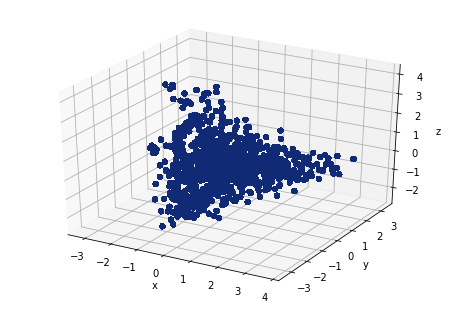

In [22]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure

import random
r = lambda: random.randint(0,255)
color_ind = ['#%02X%02X%02X' % (r(),r(),r()) for i in range(n_clusters)]
colors = [color_ind[int((i+1) % n_clusters)] for i in label_clusters]

fig = figure()
ax = Axes3D(fig)


for i in range(len(new_values)): #plot each point + it's index as text above
    ax.scatter(x_new_values,y_new_values,z_new_values,color=colors)
    
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

pyplot.show()